# Ted Talks | Wrangling

In [283]:
#imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split

%matplotlib inline
plt.style.use('ggplot')

In [284]:
#load data and make into datafame
df = pd.read_csv("../ga_tedtalks/ted_main.csv")

In [285]:
#review dataset
df

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869
5,672,"Tony Robbins discusses the ""invisible forces"" ...",1305,TED2006,1138838400,36,Tony Robbins,Tony Robbins: Why we do what we do,1,1151440680,"[{'id': 7, 'name': 'Funny', 'count': 1102}, {'...","[{'id': 229, 'hero': 'https://pe.tedcdn.com/im...",Life coach; expert in leadership psychology,"['business', 'culture', 'entertainment', 'goal...",Why we do what we do,https://www.ted.com/talks/tony_robbins_asks_wh...,20685401
6,919,When two young Mormon missionaries knock on Ju...,992,TED2006,1140739200,31,Julia Sweeney,Julia Sweeney: Letting go of God,1,1152490260,"[{'id': 3, 'name': 'Courageous', 'count': 477}...","[{'id': 22, 'hero': 'https://pe.tedcdn.com/ima...","Actor, comedian, playwright","['Christianity', 'God', 'atheism', 'comedy', '...",Letting go of God,https://www.ted.com/talks/julia_sweeney_on_let...,3769987
7,46,Architect Joshua Prince-Ramus takes the audien...,1198,TED2006,1140652800,19,Joshua Prince-Ramus,Joshua Prince-Ramus: Behind the design of Seat...,1,1152490260,"[{'id': 9, 'name': 'Ingenious', 'count': 195},...","[{'id': 750, 'hero': 'https://pe.tedcdn.com/im...",Architect,"['architecture', 'collaboration', 'culture', '...",Behind the design of Seattle's library,https://www.ted.com/talks/joshua_prince_ramus_...,967741
8,852,Philosopher Dan Dennett calls for religion -- ...,1485,TED2006,1138838400,32,Dan Dennett,Dan Dennett: Let's teach religion -- all relig...,1,1153181460,"[{'id': 3, 'name': 'Courageous', 'count': 562}...","[{'id': 71, 'hero': 'https://pe.tedcdn.com/ima...","Philosopher, cognitive scientist","['God', 'TED Brain Trust', 'atheism', 'brain',...",Let's teach religion -- all religion -- in sch...,https://www.ted.com/talks/dan_dennett_s_respon...,2567958
9,900,"Pastor Rick Warren, author of ""The Purpose-Dri...",1262,T

In [286]:
#review shape of dataset
df.shape

(2550, 17)

In [287]:
#review columns to consider features and prediction questions
df.columns

Index(['comments', 'description', 'duration', 'event', 'film_date',
       'languages', 'main_speaker', 'name', 'num_speaker', 'published_date',
       'ratings', 'related_talks', 'speaker_occupation', 'tags', 'title',
       'url', 'views'],
      dtype='object')

In [288]:
df.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [289]:
#count the number of missing values
df.isnull().sum()
#there are only 6 missing columns, that is great!

comments              0
description           0
duration              0
event                 0
film_date             0
languages             0
main_speaker          0
name                  0
num_speaker           0
published_date        0
ratings               0
related_talks         0
speaker_occupation    6
tags                  0
title                 0
url                   0
views                 0
dtype: int64

### Tags


tags: The themes associated with the talk. #count vectorizer 

In [290]:
df.tags.head(10)

0    ['children', 'creativity', 'culture', 'dance',...
1    ['alternative energy', 'cars', 'climate change...
2    ['computers', 'entertainment', 'interface desi...
3    ['MacArthur grant', 'activism', 'business', 'c...
4    ['Africa', 'Asia', 'Google', 'demo', 'economic...
5    ['business', 'culture', 'entertainment', 'goal...
6    ['Christianity', 'God', 'atheism', 'comedy', '...
7    ['architecture', 'collaboration', 'culture', '...
8    ['God', 'TED Brain Trust', 'atheism', 'brain',...
9    ['Christianity', 'God', 'culture', 'happiness'...
Name: tags, dtype: object

In [291]:
tags = df.tags

countv = CountVectorizer(max_features=100)

tag_dtm = countv.fit_transform(tags)

In [292]:
tag_df = pd.DataFrame(tag_dtm.toarray(), columns=countv.get_feature_names())
tag_df.head()

,activism,africa,animals,architecture,art,beauty,big,biodiversity,biology,biotech,...,technology,ted,tedx,trust,violence,visualizations,war,women,work,writing
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [293]:
tag_df.shape

(2550, 100)

### Rating Column

Adding a rating column to better visualize data and do comparisons

In [294]:
df_ordered = df[["title","views","duration", "comments", "num_speaker","film_date", "tags"]].sort_values('views', ascending=False)
df_ordered

,title,views,duration,comments,num_speaker,film_date,tags
0,Do schools kill creativity?,47227110,1164,4553,1,1140825600,"['children', 'creativity', 'culture', 'dance',..."
1346,Your body language may shape who you are,43155405,1262,2290,1,1340668800,"['body language', 'brain', 'business', 'psycho..."
677,How great leaders inspire action,34309432,1084,1930,1,1253145600,"['TEDx', 'business', 'entrepreneur', 'leadersh..."
837,The power of vulnerability,31168150,1219,1927,1,1275782400,"['TEDx', 'communication', 'culture', 'depressi..."
452,10 things you didn't know about orgasm,22270883,1003,354,1,1233878400,"['books', 'culture', 'history', 'humor', 'scie..."
1776,How to speak so that people want to listen,21594632,598,297,1,1370822400,"['culture', 'sound', 'speech']"
201,My stroke of insight,21190883,1099,2877,1,1204070400,"['biology', 'brain', 'consciousness', 'global ..."
5,Why we do what we do,20685401,1305,672,1,1138838400,"['business', 'culture', 'entertainment', 'goal..."
2114,This is what happens when you reply to spam email,20475972,588,150,1,1449532800,"['comedy', 'communication', 'curiosity', 'humo..."
1416,"Looks aren't everything. Believe me, I'm a model.",19787465,577,846,1,1351296000,"['TEDx', 'beauty', 'culture', 'fashion', 'phot..."


In [295]:
df_rank = df_ordered['views'].rank(axis=0, method='first', ascending=False)

In [296]:
df_rank.head()

0       1.0
1346    2.0
677     3.0
837     4.0
452     5.0
Name: views, dtype: float64

In [297]:
df["rank"] = df_rank = df_ordered['views'].rank(axis=0, method='first', ascending=False)

In [298]:
df_rank

0          1.0
1346       2.0
677        3.0
837        4.0
452        5.0
1776       6.0
201        7.0
5          8.0
2114       9.0
1416      10.0
500       11.0
1163      12.0
1036      13.0
2109      14.0
1129      15.0
553       16.0
596       17.0
1579      18.0
2161      19.0
29        20.0
1572      21.0
176       22.0
262       23.0
530       24.0
381       25.0
1501      26.0
4         27.0
1940      28.0
47        29.0
892       30.0
         ...  
1486    2521.0
1093    2522.0
1198    2523.0
292     2524.0
2507    2525.0
1192    2526.0
649     2527.0
323     2528.0
1149    2529.0
1250    2530.0
1223    2531.0
1237    2532.0
1105    2533.0
1119    2534.0
581     2535.0
590     2536.0
1053    2537.0
1301    2538.0
1179    2539.0
1061    2540.0
1178    2541.0
1104    2542.0
1079    2543.0
1141    2544.0
1229    2545.0
1133    2546.0
776     2547.0
237     2548.0
1112    2549.0
594     2550.0
Name: views, Length: 2550, dtype: float64

In [299]:
df_ordered['rank'] = df['rank'].rank(ascending=True)

In [300]:
df_ordered.head()

,title,views,duration,comments,num_speaker,film_date,tags,rank
0,Do schools kill creativity?,47227110,1164,4553,1,1140825600,"['children', 'creativity', 'culture', 'dance',...",1.0
1346,Your body language may shape who you are,43155405,1262,2290,1,1340668800,"['body language', 'brain', 'business', 'psycho...",2.0
677,How great leaders inspire action,34309432,1084,1930,1,1253145600,"['TEDx', 'business', 'entrepreneur', 'leadersh...",3.0
837,The power of vulnerability,31168150,1219,1927,1,1275782400,"['TEDx', 'communication', 'culture', 'depressi...",4.0
452,10 things you didn't know about orgasm,22270883,1003,354,1,1233878400,"['books', 'culture', 'history', 'humor', 'scie...",5.0


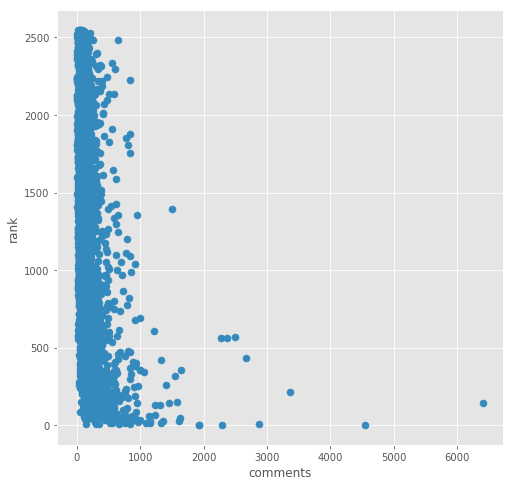

In [301]:
df.plot(kind = 'scatter', x = 'comments', y = 'rank', s = 50, figsize = (8,8))

In [302]:
#lm plot with seaborn and doing a regression line

In [303]:
# sns.lmplot(x = "duration", y = "views", data = df_ordered, x_estimator=np.mea)

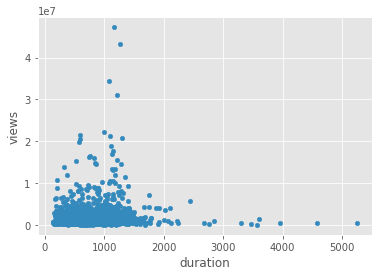

In [304]:
df.plot(kind = 'scatter', x = 'duration', y ='views')

In [305]:
df_ordered.tags.head(10)

0       ['children', 'creativity', 'culture', 'dance',...
1346    ['body language', 'brain', 'business', 'psycho...
677     ['TEDx', 'business', 'entrepreneur', 'leadersh...
837     ['TEDx', 'communication', 'culture', 'depressi...
452     ['books', 'culture', 'history', 'humor', 'scie...
1776                       ['culture', 'sound', 'speech']
201     ['biology', 'brain', 'consciousness', 'global ...
5       ['business', 'culture', 'entertainment', 'goal...
2114    ['comedy', 'communication', 'curiosity', 'humo...
1416    ['TEDx', 'beauty', 'culture', 'fashion', 'phot...
Name: tags, dtype: object

In [306]:
tags = df_ordered.tags

countv = CountVectorizer(max_features=100) #top 100 tags used

tag_dtm = countv.fit_transform(tags)

In [307]:
tag_df = pd.DataFrame(tag_dtm.toarray(), columns=countv.get_feature_names())
tag_df.head()

,activism,africa,animals,architecture,art,beauty,big,biodiversity,biology,biotech,...,technology,ted,tedx,trust,violence,visualizations,war,women,work,writing
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [308]:
tag_df.shape

(2550, 100)

In [309]:
#top tags used for ted talks
tag_df.sum().sort_values(ascending=False)

technology       727
science          675
global           565
design           526
issues           501
health           489
culture          486
tedx             450
business         374
change           305
entertainment    299
art              289
social           270
ted              265
biology          234
innovation       229
society          224
music            220
brain            207
future           195
communication    191
creativity       189
economics        187
humanity         182
collaboration    174
environment      165
medicine         162
activism         157
education        153
community        148
                ... 
disease           79
oceans            77
physics           75
big               74
green             73
happiness         73
potential         73
biotech           72
mind              71
language          70
evolution         68
writing           67
film              67
gender            67
public            65
problems          65
philosophy   

In [453]:
df_ordered_tags = pd.concat([ df_ordered, tag_df], axis = 1)

In [527]:
df_data = df_ordered_tags.drop(['tags', 'title', 'rank', 'film_date'], axis = 1)

In [528]:
df_data.head()

,views,duration,comments,num_speaker,activism,africa,animals,architecture,art,beauty,...,technology,ted,tedx,trust,violence,visualizations,war,women,work,writing
0,47227110,1164,4553,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3200520,977,265,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1636292,1286,124,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1697550,1116,200,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,12005869,1190,593,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [529]:
df_data.shape

(2550, 104)

In [530]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [531]:
y = df_data["views"] #target variable
X = df_data.drop("views", axis=1) #predictors

In [532]:
# STEP 1: split X and y into training and testing sets (using random_state for reproducibility)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99, test_size=0.6)


In [533]:
assert X.shape[0] == y.shape[0]  #check that they are the same

In [534]:
print (X_train.shape)
print (y_train.shape)

(1020, 103)
(1020,)


In [535]:
# df_data.dtypes

In [536]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

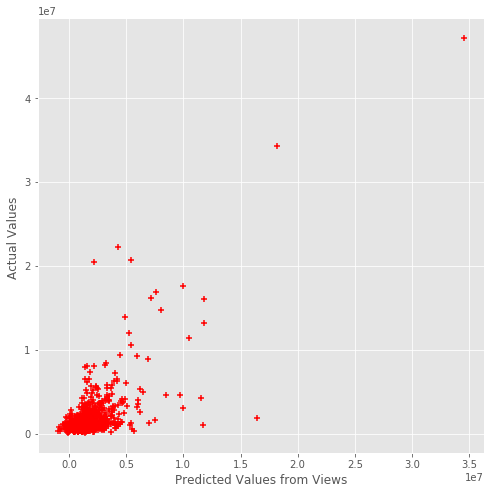

score:  0.4985214778383458


In [537]:
predictions = lm.predict(X_train)
score = lm.score(X_train, y_train)

plt.figure(figsize=(8,8))
plt.scatter(predictions, y_train, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from Views")
plt.ylabel("Actual Values ")
plt.show()

print ("score: ", score)

In [538]:
# low score

In [539]:
import sklearn.metrics

In [540]:
# sklearn.metrics.mean_squared_error(y_true, y_pred, sample_weight=None, multioutput=’uniform_average’)[source]
# sklearn.metrics.mean_squared_error(y_test, predictions)

### Using Ridge model instead of a standard LinearRegression


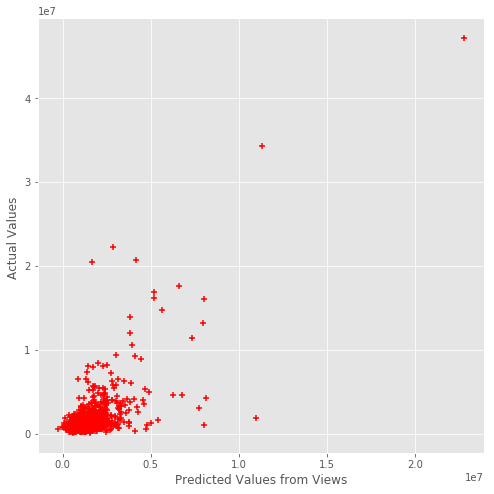

score:  0.41447744807497683


In [541]:
# TRAINING SET
lmr = Ridge()
lmr.fit(X, y) 

predictions = lmr.predict(X_train)
score = lmr.score(X_train, y_train)

plt.figure(figsize=(8,8))
plt.scatter(predictions, y_train, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from Views")
plt.ylabel("Actual Values ")
plt.show()

print ("score: ", score)


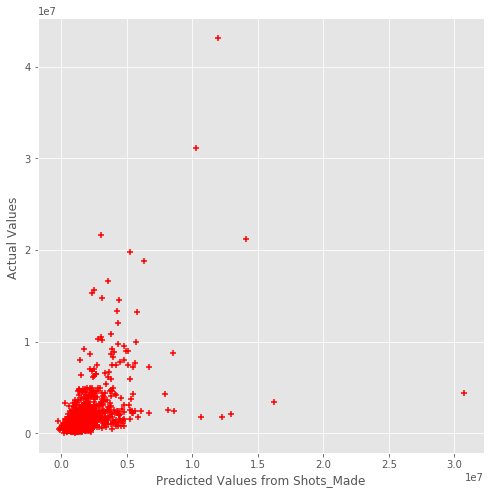

score:  0.2091159214639785


In [542]:

#TEST SET
lmr = Ridge()
lmr.fit(X, y) 

predictions = lmr.predict(X_test)
score = lmr.score(X_test, y_test)

plt.figure(figsize=(8,8))
plt.scatter(predictions, y_test, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from Shots_Made")
plt.ylabel("Actual Values ")
plt.show()

print ("score: ", score)

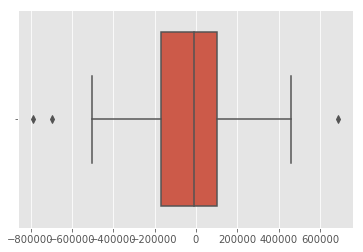

In [543]:
sns.boxplot(lmr.coef_)

In [544]:
from sklearn.datasets import make_regression

In [545]:
X, y = make_regression(n_features=2, random_state=0)
regr = ElasticNet(random_state=0)
regr.fit(X, y)

print(regr.coef_) 

print(regr.intercept_) 

print(regr.predict([[0, 0]])) 


[18.83816048 64.55968825]
1.4512607561654032
[1.45126076]


In [548]:
from sklearn import linear_model
reg = linear_model.Ridge (alpha = .5)
reg.fit (X, y) 


reg.coef_

reg.intercept_ 


0.02125714112422461

In [ ]:
#Intialize vectorizer object
vect = CountVectorizer()

#Fit and transform with training data
X_train_dtm = vect.fit_transform(X_train)

#Transform the testing data
X_test_dtm = vect.transform(X_test)

In [ ]:
#Vectorized data shapes

print X_train_dtm.shape
print X_test_dtm.shape

In [ ]:
# first 50 features
print vect.get_feature_names()[:50]

In [ ]:
# Random selection of 50 features
print vect.get_feature_names()[8000:8050]